In [1]:
# pytorch-common-import!
import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [4]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

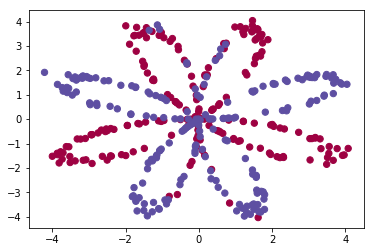

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [6]:
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).float()

In [7]:
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))

In [8]:
optimizer = torch.optim.SGD([w,b], 1e-1)

In [9]:
criterion = nn.BCEWithLogitsLoss()

In [10]:
def logistic_regression(x):
    return torch.mm(x, w) + b

In [11]:
for i in range(1000):
    y_predict = logistic_regression(x_train)
    loss = criterion(y_predict, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(i +1, loss.data))

epoch: 20, loss: 1.0001314878463745
epoch: 40, loss: 0.6932222843170166
epoch: 60, loss: 0.6736534237861633
epoch: 80, loss: 0.6731613874435425
epoch: 100, loss: 0.6731480360031128
epoch: 120, loss: 0.6731467247009277
epoch: 140, loss: 0.6731463670730591
epoch: 160, loss: 0.6731463670730591
epoch: 180, loss: 0.6731463074684143
epoch: 200, loss: 0.67314612865448
epoch: 220, loss: 0.6731460690498352
epoch: 240, loss: 0.6731460690498352
epoch: 260, loss: 0.67314612865448
epoch: 280, loss: 0.6731461882591248
epoch: 300, loss: 0.6731460690498352
epoch: 320, loss: 0.6731460690498352
epoch: 340, loss: 0.6731463074684143
epoch: 360, loss: 0.6731463074684143
epoch: 380, loss: 0.6731461882591248
epoch: 400, loss: 0.6731461882591248
epoch: 420, loss: 0.6731461882591248
epoch: 440, loss: 0.6731461882591248
epoch: 460, loss: 0.6731463074684143
epoch: 480, loss: 0.6731461882591248
epoch: 500, loss: 0.6731461882591248
epoch: 520, loss: 0.6731461882591248
epoch: 540, loss: 0.6731461882591248
epoch: 56

In [12]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5,1,'logistic regression')

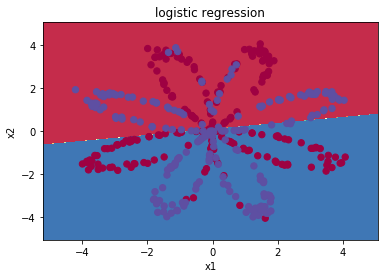

In [13]:
plot_decision_boundary(lambda x: plot_logistic(x), x_train.numpy(), y_train.numpy())
plt.title('logistic regression')

In [14]:
w1 = nn.Parameter(torch.randn(2, 4) * 0.01 )

In [15]:
b1 = nn.Parameter(torch.zeros(4))

In [16]:
w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

In [17]:
def two_nets(x):
    y_predict_linear = torch.mm(x, w1) + b1
    y_active = F.tanh(y_predict_linear)
    y_predict_nn = torch.mm(y_active, w2) + b2
    return y_predict_nn

In [18]:
optimizeri = torch.optim.SGD([w1, w2, b1, b2], 1.)

In [19]:
criterion_nn = nn.BCEWithLogitsLoss()

In [20]:
for i in range(1000):
    y_predict_nn = two_nets(x_train)
    loss = criterion_nn(y_predict_nn, y_train)
    optimizeri.zero_grad()
    loss.backward()
    optimizeri.step()
    if (i + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(i +1, loss.data))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instea

epoch: 20, loss: 0.6797726154327393
epoch: 40, loss: 0.6639715433120728
epoch: 60, loss: 0.6261594891548157
epoch: 80, loss: 0.6151159405708313
epoch: 100, loss: 0.6088701486587524
epoch: 120, loss: 0.6041168570518494
epoch: 140, loss: 0.5664106011390686
epoch: 160, loss: 0.439256489276886
epoch: 180, loss: 0.39016854763031006
epoch: 200, loss: 0.36714252829551697
epoch: 220, loss: 0.35372409224510193
epoch: 240, loss: 0.3447295129299164
epoch: 260, loss: 0.3381347954273224
epoch: 280, loss: 0.33299964666366577


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instea

epoch: 300, loss: 0.32882845401763916
epoch: 320, loss: 0.32533445954322815
epoch: 340, loss: 0.32233908772468567
epoch: 360, loss: 0.3197246491909027
epoch: 380, loss: 0.3174102008342743
epoch: 400, loss: 0.31533753871917725
epoch: 420, loss: 0.31346395611763
epoch: 440, loss: 0.31175684928894043
epoch: 460, loss: 0.3101913332939148
epoch: 480, loss: 0.30874761939048767
epoch: 500, loss: 0.30741000175476074
epoch: 520, loss: 0.3061654567718506
epoch: 540, loss: 0.3050035536289215
epoch: 560, loss: 0.3039152920246124


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instea

epoch: 580, loss: 0.3028933107852936
epoch: 600, loss: 0.30193114280700684
epoch: 620, loss: 0.3010231852531433
epoch: 640, loss: 0.30016452074050903
epoch: 660, loss: 0.2993507981300354
epoch: 680, loss: 0.298578143119812
epoch: 700, loss: 0.2978430688381195
epoch: 720, loss: 0.2971424162387848
epoch: 740, loss: 0.29647326469421387
epoch: 760, loss: 0.29583320021629333
epoch: 780, loss: 0.2952195703983307
epoch: 800, loss: 0.29463061690330505
epoch: 820, loss: 0.29406413435935974
epoch: 840, loss: 0.29351842403411865
epoch: 860, loss: 0.29299196600914
epoch: 880, loss: 0.2924833595752716
epoch: 900, loss: 0.2919909954071045
epoch: 920, loss: 0.29151394963264465
epoch: 940, loss: 0.2910510301589966
epoch: 960, loss: 0.29060107469558716
epoch: 980, loss: 0.29016339778900146
epoch: 1000, loss: 0.289736807346344


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instea

In [22]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


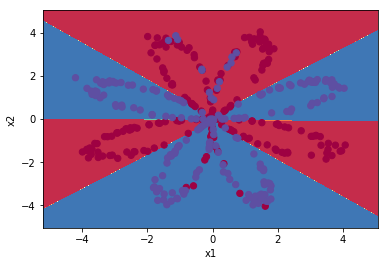

In [23]:
plot_decision_boundary(lambda x: plot_network(x), x_train.numpy(), y_train.numpy())

In [25]:
seq_net = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [26]:
param = seq_net.parameters()

In [27]:
optimizer_seq = torch.optim.SGD(param, 1.)

In [30]:
for i in range(10000):
    out = seq_net(x_train)
    loss = criterion(out, y_train)
    optimizer_seq.zero_grad()
    loss.backward()
    optimizer_seq.step()
    if (i + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(i+1, loss.data))

epoch: 1000, loss: 0.2716503441333771
epoch: 2000, loss: 0.2647245526313782
epoch: 3000, loss: 0.2600041925907135
epoch: 4000, loss: 0.25663092732429504
epoch: 5000, loss: 0.25413063168525696
epoch: 6000, loss: 0.2522176206111908
epoch: 7000, loss: 0.25071412324905396
epoch: 8000, loss: 0.24950572848320007
epoch: 9000, loss: 0.24851572513580322
epoch: 10000, loss: 0.24769122898578644


In [31]:
def plot_seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5,1,'sequential')

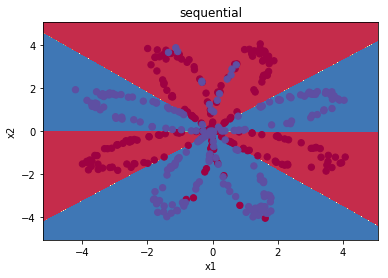

In [33]:
plot_decision_boundary(lambda x: plot_seq(x), x_train.numpy(), y_train.numpy())
plt.title('sequential')